# X-ray Analysis
Next, let's try using the X-ray analysis portion of the package



In [1]:
import context

from G4EPP import XrayAnalysis
from G4EPP import EnergyDistributions as dists
from G4EPP import api


import matplotlib.pyplot as plt
import numpy as np

X-ray response to an energetic electron precipitation event with the following characterisitics:

- Energy distribution: exponential energy $\propto e^{-E/E_0}$ with folding energies E$_0$ = 100, 500, and 1000 keV

- Flux: 10$^4$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$ keV$^{-1}$ 

- Pitch angle distribution: $\propto \sin(\alpha)$

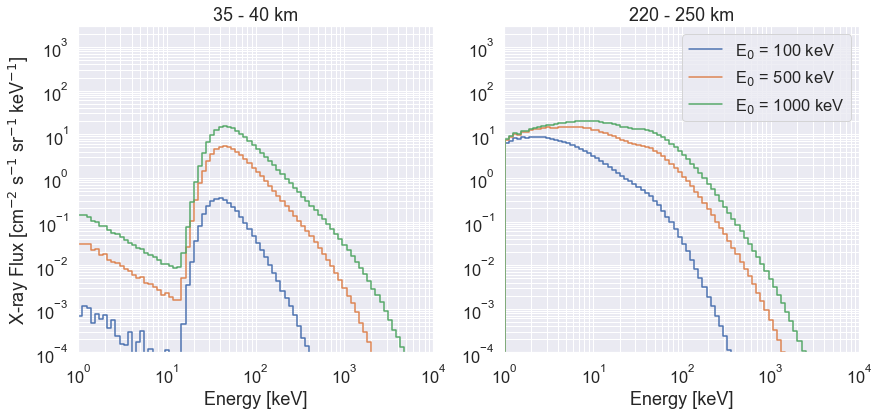

In [2]:
X = XrayAnalysis();

Eabsc = api().get_energy_array()

E     = api().get_run_list() * 1e3 # keV to eV
PA    = api().get_PA_list()        # deg

ExpDist = dists().exponential()

plt.figure(figsize=(14,6)); plt.subplot(1,2,1); plt.grid(True, which='both')

PAD = np.sin(np.deg2rad(PA)) # sine
#PAD = np.ones(PA.shape)      # isotropic

for E0 in [100*1e3, 500*1e3, 1000*1e3]:
    spectrum = X.getSpectrumAtAltitude(ExpDist(E, E0), PAD, 1e4, [35, 40])

    plt.step(Eabsc, spectrum)
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Energy [keV]")
plt.ylabel("X-ray Flux [cm$^{-2}$ s$^{-1}$ sr$^{-1}$ keV$^{-1}$]")
plt.ylim(1e-4, 3e3);
plt.xlim(1e0, 1e4);
plt.title('35 - 40 km')

plt.subplot(1,2,2); plt.grid(True, which='both')

for E0 in [100*1e3, 500*1e3, 1000*1e3]:
    spectrum = X.getSpectrumAtAltitude(ExpDist(E, E0), np.sin(np.deg2rad(PA)), 1e4, [220, 250])

    plt.step(Eabsc, spectrum, label='E$_0$ = %.0f keV' % (1e-3*E0))
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Energy [keV]")
#plt.ylabel("Flux [cm$^{-2}$ s$^{-1}$ sr$^{-1}$ keV$^{-1}$]")
plt.ylim(1e-4, 3e3);
plt.xlim(1e0, 1e4);
plt.title('220 - 250 km');
plt.legend();